Python Imports

In [43]:
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import random

Data Processing

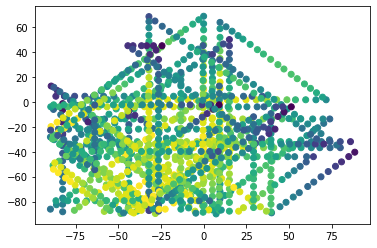

In [163]:
def read_data(path = "data.txt"):
  data = []

  with open(path) as h:
    buf = []

    for line in h.readlines():
      if len(line.strip()) == 0:
        if len(buf) > 0:
          data.append(buf)
          buf = []
      else:
        buf.append([float(x) for x in line.strip().split(',')])

    data.append(buf)
  
  return data

def calculate_positions(sections):
  positions = [np.array((0, 0))]
  heats = []

  for section in read_data(DATA_FILE_PATH):
    prev = section[0][1]

    for right, forward, angle, heat in section[1:]:
      next = np.array(forward)

      angle = math.radians(angle + 90)

      rdp = np.array([np.cos(angle), np.sin(angle)]) * abs(next - prev)

      positions.append(positions[-1] + rdp)

      heats.append(heat)

      prev = next
  
  positions = positions[1:]

  return list(filter(lambda d: abs(d[0][0]) < MAX and abs(d[0][1]) < MAX, zip(positions, heats)))

positions_heats = calculate_positions(read_data(DATA_FILE_PATH))

plt.scatter([x[0][0] for x in positions_heats], [x[0][1] for x in positions_heats], c=[x[1] for x in positions_heats])

Initial State of Heat Map

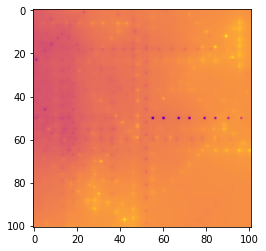

In [170]:
def get_heat_matrix(positions_heats, grid_range=(-10,10)):
  grid = []

  for i in range(grid_range[0], grid_range[1] + 1):
    row = []
    for j in range(grid_range[0], grid_range[1] + 1):
      sum_weight_heats = 0
      sum_weights = 0

      for position, heat in positions_heats:
        distance = abs(position[0] - i) + abs(position[1] - j)

        weight = 1 / distance

        sum_weight_heats += heat * weight

        sum_weights += weight

      row.append(sum_weight_heats / sum_weights)

    grid.append(row)

  return np.array(grid)

grid = get_heat_matrix(calculate_positions(read_data(DATA_FILE_PATH)), grid_range=(-50, 50))

plt.imshow(grid, cmap=plt.cm.plasma_r)

Heat Equation using Newton's Method

In [171]:
def heat_equation(grid, lowest_heat = 20, dt = 0.01, duration = 250):
  grid = grid.copy()

  images = []

  for _ in range(0, duration):
    next_grid = np.zeros(grid.shape)

    for i in range(0, grid.shape[0]):
      for j in range(0, grid.shape[1]):
        lplcn = 0
        lplcn += grid[i - 1, j] if i > 0 else lowest_heat
        lplcn += grid[i, j - 1] if j > 0 else lowest_heat
        lplcn += grid[i + 1, j] if i < grid.shape[0] - 1 else lowest_heat
        lplcn += grid[i, j + 1] if j < grid.shape[1] - 1 else lowest_heat
        lplcn -= 4 * grid[i, j]

        next_grid[i, j] = grid[i, j] + dt * lplcn
    
    grid = next_grid

    images.append([plt.imshow(grid, animated=True, cmap=plt.cm.plasma_r)])
  
  return images

Heat Equation Animation

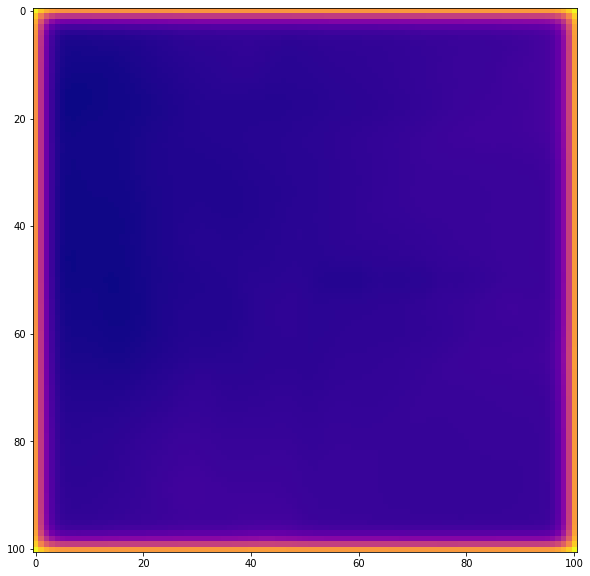

In [172]:
fig = plt.figure(figsize=(15, 10))

ani = animation.ArtistAnimation(fig, heat_equation(grid, duration=250, lowest_heat=0), interval=50, blit=True, repeat_delay=1000)

ani.save("heat_equation.mp4")